In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt 

## Let say

Let say, TWTR.csv is my realtime data (follow [realtime-evolution-strategy.ipynb](realtime-evolution-strategy.ipynb)), remember, we trained using `Close`, and `Volume` data.

So every request means new daily data.

You can improve the code to bind historical data with your own database or any websocket streaming data. Imagination is your limit now.

In [2]:
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/26/2024,175.99,176.42,171.40,173.69,"56,500,793"
1,4/25/2024,153.36,158.28,152.77,157.95,"36,197,793"
2,4/24/2024,159.09,161.39,158.82,161.10,"19,485,689"
3,4/23/2024,158.59,160.48,157.97,159.92,"16,115,410"
4,4/22/2024,156.01,159.19,155.66,157.95,"17,243,869"


In [3]:
# Load data
df = pd.read_csv('GOOGL.csv')
close = df['Close'].tolist()
volume = df['Volume'].tolist()


## Check balance

In [4]:
requests.get('http://localhost:8005/balance').json()

5993.54004

This is the initial capital we have for now, you can check [agent.ipynb](https://github.com/huseinzol05/Stock-Prediction-Models/blob/master/realtime-agent/agent.ipynb) how I defined it, or you can overwrite it.

## Trading

In [5]:
import json

data = json.dumps([close[0], volume[0]])
data

'[50.220219, 44659096]'

Remember, my last training session was only used `Close` and `Volume`, you need to edit it to accept any kind of parameters.

In [6]:
requests.get('http://localhost:8005/trade?data='+data).json()

{'action': 'fail',
 'balance': 5993.54004,
 'status': 'data not enough to trade',
 'timestamp': '2024-08-30 12:03:53.881769'}

Reason why you got 'data not enough to trade', because, the agent waiting another data to complete the queue, atleast same as `window_size` size.

Last time I defined `window_size` is 20, means, it only look back 20 historical data to trade.

Assume now, you have 100 times new datapoints going in, you want to trade these datapoints.

In [7]:
for i in range(200):
    data = json.dumps([close[i], volume[i]])
    requested = requests.get('http://localhost:8005/trade?data=' + data).json()
    print(requested)

{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-30 12:03:55.954134'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-30 12:03:58.003482'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-30 12:04:00.051591'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-30 12:04:02.099840'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-30 12:04:04.150485'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-30 12:04:06.189817'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-30 12:04:08.236489'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-30 12:04:10.287170'}
{'action': 'fail

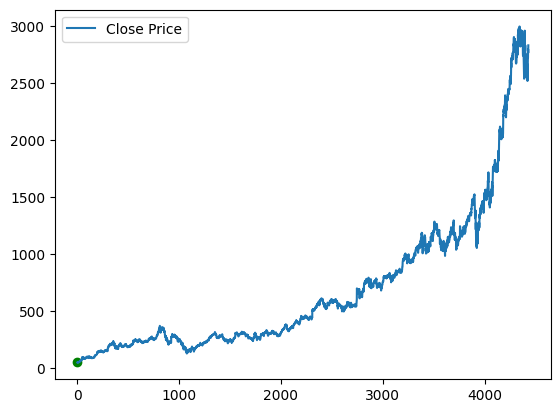

In [ ]:
# Initialize plot
plt.ion()
fig, ax = plt.subplots()
ax.plot(close, label='Close Price')
ax.legend()

# Loop through data and make trading decisions
for i in range(len(close)):
    # Prepare data for trading
    data = json.dumps([close[i], volume[i]])
    
    # Make trading decision
    requested = requests.get('http://localhost:8005/trade?data=' + data).json()
    
    # Update plot
    ax.scatter(i, close[i], color='r' if requested['action'] == 'buy' else 'g')  # Plot buy/sell points
    plt.pause(0.01)

plt.ioff()
plt.show()